<a href="https://colab.research.google.com/github/nickdinos/link/blob/main/Project10_BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#==========================================
#Bike Sharing Dataset - Nick Druke, Joshua Brown, Evelyn De La Fuente
#==========================================

#Hadi Fanaee-T

#Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
#INESC Porto, Campus da FEUP
#Rua Dr. Roberto Frias, 378
#4200 - 465 Porto, Portugal


#=========================================
#Background
#=========================================

#Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
#back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
#back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
#over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
#environmental and health issues.

#Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
#these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
#of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
#a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
#events in the city could be detected via monitoring these data.

#=========================================
#Data Set
#=========================================
#Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
#precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to
#the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
#publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
#extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

#=========================================
#Associated tasks
#=========================================

#        - Regression:
#                Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

#        - Event and Anomaly Detection:
#                Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
#                For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are
#                identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


#=========================================
#Files
#=========================================

#        - Readme.txt
#        - hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
#        - day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


#=========================================
#Dataset characteristics
#=========================================
#Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

#        - instant: record index
#        - dteday : date
#        - season : season (1:springer, 2:summer, 3:fall, 4:winter)
#        - yr : year (0: 2011, 1:2012)
#        - mnth : month ( 1 to 12)
#        - hr : hour (0 to 23)
#        - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#        - weekday : day of the week
#        - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#        + weathersit :
#                - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#                - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#                - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#                - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#        - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#        - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#        - hum: Normalized humidity. The values are divided to 100 (max)
#        - windspeed: Normalized wind speed. The values are divided to 67 (max)
#        - casual: count of casual users
#        - registered: count of registered users
#        - cnt: count of total rental bikes including both casual and registered

#=========================================
#License
#=========================================
#Use of this dataset in publications must be cited to the following publication:

#[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

#@article{
#        year={2013},
#        issn={2192-6352},
#        journal={Progress in Artificial Intelligence},
#        doi={10.1007/s13748-013-0040-3},
#        title={Event labeling combining ensemble detectors and background knowledge},
#        url={http://dx.doi.org/10.1007/s13748-013-0040-3},
#        publisher={Springer Berlin Heidelberg},
#        keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
#        author={Fanaee-T, Hadi and Gama, Joao},
#        pages={1-15}
#}

#=========================================
#Contact
#=========================================

#For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

Upload your dataset and inspect its structure (columns, types, first rows, statistics).
Clean the data: remove duplicates, fix errors, and handle missing values (fill or remove as appropriate).
Perform Exploratory Data Analysis (EDA) with matplotlib to visualize patterns and relationships.
Encode categorical variables (if needed) using label or one-hot encoding.
Select and engineer features by keeping relevant ones and creating or removing columns as needed.

# Upload your dataset and inspect its structure (columns, types, first rows, statistics).
# Clean the data: remove duplicates, fix errors, and handle missing values (fill or remove as appropriate).
# Perform Exploratory Data Analysis (EDA) with matplotlib to visualize patterns and relationships.
# Encode categorical variables (if needed) using label or one-hot encoding.
# Select and engineer features by keeping relevant ones and creating or removing columns as needed.

In [11]:
print('Nick Druke: created both graphs and fixed coding erros')
print('Josh Brown: cleaned the data')
print('Evelyn Fuente: performed EDA and encoded categorical variables')

Nick Druke: created both graphs and fixed coding erros
Josh Brown: cleaned the data
Evelyn Fuente: performed EDA and encoded categorical variables


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
from google.colab import files
import pandas as pd
uploaded = files.upload()



Saving MARE 111_DayDataSheet.xlsx to MARE 111_DayDataSheet.xlsx


In [14]:
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)
display(df.sample(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
333,334,2011-11-30,4,0,11,0,3,1,1,0.325000,0.311221,0.613333,0.271158,188,3425,3613
503,504,2012-05-18,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,7639
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
531,532,2012-06-15,2,1,6,0,5,1,1,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
536,537,2012-06-20,2,1,6,0,3,1,1,0.782500,0.720975,0.592083,0.113812,872,5339,6211
398,399,2012-02-03,1,1,2,0,5,1,1,0.313333,0.309346,0.526667,0.178496,310,3841,4151
61,62,2011-03-03,1,0,3,0,4,1,1,0.198333,0.200133,0.318333,0.225754,123,1562,1685
334,335,2011-12-01,4,0,12,0,4,1,1,0.312500,0.305554,0.524583,0.220158,182,3545,3727
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
173,174,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790


In [15]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
print(df.info())
print(df.describe())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
df = df.drop_duplicates()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


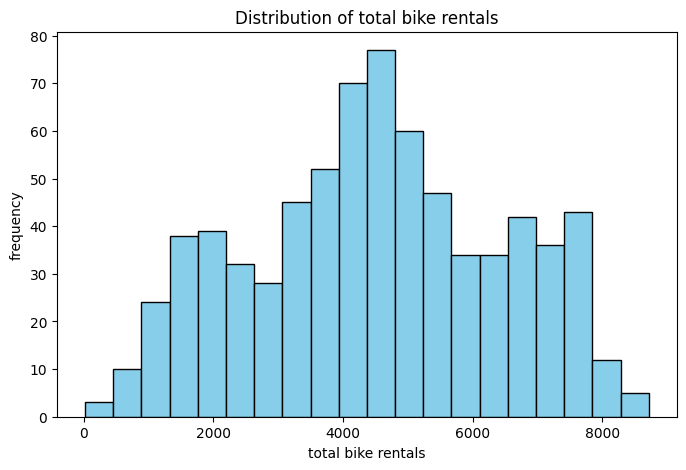

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['cnt'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of total bike rentals')
plt.xlabel('total bike rentals')
plt.ylabel('frequency')
plt.show()

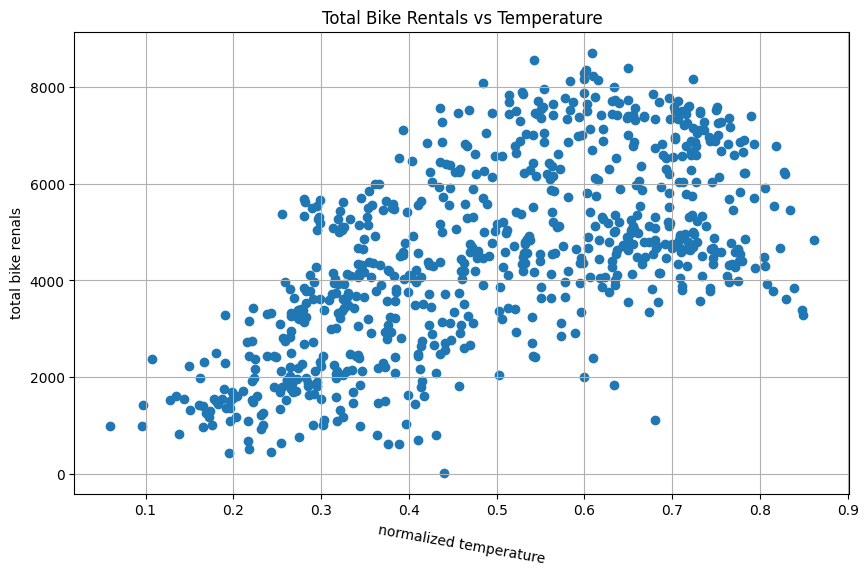

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], alpha=1)
plt.title('Total Bike Rentals vs Temperature')
plt.xlabel('normalized temperature', rotation= - 10)
plt.ylabel('total bike renals')
plt.grid(True)
plt.show()

In [20]:
# from sklearn.preprocessing import LabelEncoder

# categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] #x values
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# display(df_encoded.head())

In [21]:
df_encoded_feature =df

# display(df_encoded_feature.corr())
# display(df_encoded_feature)

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd
x_reg = df_encoded_feature.drop(columns = ['cnt', 'dteday'])
y_reg = df_encoded_feature['cnt']
x_train_cls, x_test_cls, y_train_cls, y_test_cls = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

print("X_train_cls:", x_train_cls.shape)
print("X_test_cls:", x_test_cls.shape)
print("Y_train_cls shape:", y_train_cls.shape)
print("Y_test_cls shape:", y_test_cls.shape)

X_train_cls: (584, 14)
X_test_cls: (147, 14)
Y_train_cls shape: (584,)
Y_test_cls shape: (147,)


In [29]:
x_train_cls

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
682,683,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767
250,251,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689
336,337,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,2908
260,261,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,2921
543,544,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,1435
106,107,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,2186
270,271,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427
435,436,1,1,3,0,0,0,1,0.361739,0.359670,0.476957,0.222587,1658,3253


In [30]:
from sklearn.linear_model import LinearRegression

#regression model (linear regression)
reg = LinearRegression()
reg.fit(x_train_cls, y_train_cls)

y_pred_clf = reg.predict(x_test_cls)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_cls, y_pred_clf)
mse = mean_squared_error(y_test_cls, y_pred_clf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_cls, y_pred_clf)
print(f"Regression - LinearRegression - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Regression - LinearRegression - MAE: 0.00, RMSE: 0.00, R2: 1.00


In [32]:
#make a Confuision Matrix table from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#regression model (linear regression)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(x_train_cls, y_train_cls)

y_pred_clf = reg.predict(x_test_cls)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_cls, y_pred_clf)
mse = mean_squared_error(y_test_cls, y_pred_clf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_cls, y_pred_clf)
print(f"Regression - RandomLinearRegression - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Regression - RandomLinearRegression - MAE: 65.36, RMSE: 101.97, R2: 1.00
